# SVM for Linear Classification:

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])


In [3]:
#labels
y = np.array([-1,-1,1,1,1])


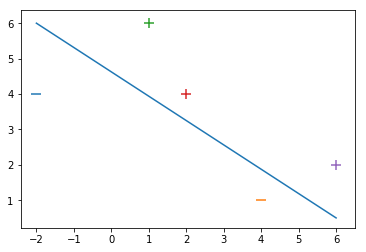

In [4]:
for d, sample in enumerate(X):
    if d<2:
        plt.scatter(sample[0],sample[1],s=120,marker="_",linewidths=2)
    else:
        plt.scatter(sample[0],sample[1],s=120 ,marker="+",linewidths=2)
plt.plot([-2,6],[6,0.5])

Hinge loss to calculate for maximum margin classification


In [5]:
def svm_sgd_plot(X,Y):
    w = np.zeros(len(X[0])) #weights
    eta = .3 #learning rate
    errors=[] # to store list of errors
    epoch =100000
    for epoch in range(1,epoch):
        error=0
        for i,x in enumerate(X):
            if (Y[i]*np.dot(X[i],w)) < 1:#incorrect classification
                w=w + eta *(X[i]*Y[i]-2 *(1/epoch)*w)
                error =1
            else:
                w = w + eta *(-2 *(1/epoch)*w) #correct classification
        errors.append(error)
        
    plt.plot(errors,'|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Missclassified')
    
    plt.show()
    
    return w


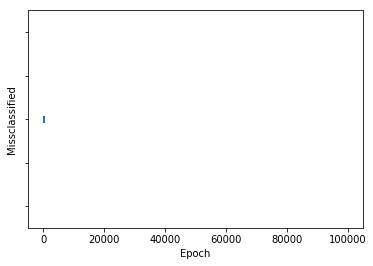

In [6]:
w = svm_sgd_plot(X,y)


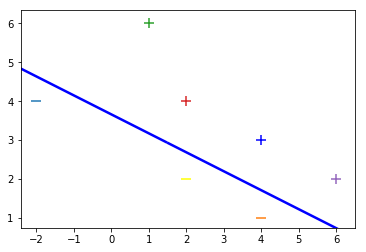

In [7]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]
x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')